In [3]:
#importing necessary libraries
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px 

In [5]:
#Getting the data and renaming it shamiri_data
shamiri_data = pd.read_csv(r"shamiri_imputed_dataset.csv")
shamiri_data = shamiri_data.copy()
shamiri_data

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,...,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
0,SR_001,3,0,2,1,1,1,3,1,1,...,7,6,7,6,6,Minority,M,Starays,18.0,Poor
1,SR_002,3,0,1,0,0,1,2,2,0,...,7,5,7,3,6,Minority,M,Starays,16.0,Poor
2,SR_003,2,3,0,1,2,3,1,2,0,...,5,2,2,5,5,Minority,F,Starays,14.0,Poor
3,SR_004,1,3,1,1,2,1,3,1,3,...,4,4,5,4,3,Minority,M,Starays,20.0,Poor
4,SR_005,1,1,0,1,0,3,3,0,1,...,6,6,2,6,2,Minority,M,Starays,18.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,OLY_208,3,2,1,1,0,2,3,0,1,...,6,5,4,7,5,Minority,F,Olympic,15.0,Medium
654,OLY_209,3,3,3,3,3,3,3,3,0,...,4,3,3,4,5,Majority,F,Olympic,16.0,Medium
655,OLY_210,2,3,3,3,2,3,3,2,2,...,5,6,7,7,6,Minority,F,Olympic,16.0,Medium
656,OLY_211,0,0,0,0,0,0,0,0,0,...,6,5,2,5,5,Majority,F,Olympic,16.0,Medium


# Exploratory Data Analysis

In [9]:
# Checking information in the data                                                       
shamiri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ParticipantID     658 non-null    object 
 1   PHQ1              658 non-null    int64  
 2   PHQ2              658 non-null    int64  
 3   PHQ3              658 non-null    int64  
 4   PHQ4              658 non-null    int64  
 5   PHQ5              658 non-null    int64  
 6   PHQ6              658 non-null    int64  
 7   PHQ7              658 non-null    int64  
 8   PHQ8              658 non-null    int64  
 9   GAD1              658 non-null    int64  
 10  GAD2              658 non-null    int64  
 11  GAD3              658 non-null    int64  
 12  GAD4              658 non-null    int64  
 13  GAD5              658 non-null    int64  
 14  GAD6              658 non-null    int64  
 15  GAD7              658 non-null    int64  
 16  MSSS1             658 non-null    int64  
 1

In [6]:
#Checking for the dimensions of the data
shamiri_data.shape

(658, 33)

In [10]:
#Checking for Missing values in the data
shamiri_data.isnull().sum()

ParticipantID       0
PHQ1                0
PHQ2                0
PHQ3                0
PHQ4                0
PHQ5                0
PHQ6                0
PHQ7                0
PHQ8                0
GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
MSSS1               0
MSSS2               0
MSSS3               0
MSSS4               0
MSSS5               0
MSSS6               0
MSSS7               0
MSSS8               0
MSSS9               0
MSSS10              0
MSSS11              0
MSSS12              0
Tribe               0
Gender              0
School              0
Age                 0
School_Resources    0
dtype: int64

* *The data is complete ~ No Missing values*

In [11]:
#Checking the statistical measures.
shamiri_data.describe()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,GAD2,...,MSSS4,MSSS5,MSSS6,MSSS7,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Age
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,...,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,1.329787,1.217325,1.153495,1.148936,0.933131,1.276596,1.410334,0.756839,1.048632,1.319149,...,5.305471,5.288754,4.556231,4.270517,4.879939,4.854103,5.153495,5.449848,4.206687,15.847264
std,1.076550,1.110297,1.164869,1.016907,1.116541,1.174086,1.119367,1.003111,1.011685,1.144758,...,1.818056,1.847758,1.723867,1.887977,1.976080,1.805620,1.973761,1.731104,1.869360,1.413083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,5.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,5.000000,3.000000,15.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000,16.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,...,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,17.000000
max,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,25.000000


*Data Size: The dataset contains 658 data points for each variable.*

*PHQ Scores: The first eight variables (PHQ1 to PHQ8) represents the Patient Health Questionnaire (PHQ), which is used to assess depression levels. The mean values are generally low, indicating that on average, respondents are reporting low levels of depression and anxiety symptoms.*

*GAD Scores: The variables (GAD1 to GAD7)  represents scores related to the Generalized Anxiety Disorder (GAD) assessment. Similar to the Depression scores, the mean values are relatively low, suggesting low average anxiety levels.*

*MSSS Scores: The variables (MSSS1 to MSSS12) represents Perceived Social Support. These scores have a scale from 1 to 7 (or 1 to 8 in the case of MSSS10), and the means for each variable are around the middle of this range, indicating a moderate level of some reported Perceived Social Support.*

*Age: The variable  'Age,' represents the age of the respondents. The mean age is approximately 15.85 years, with a minimum of 12 years and a maximum of 25 years. The majority of respondents fall between 15 and 17 years old, with some outliers on the higher end of the age range.*

*Data Range: For most variables, the data range from the minimum to the maximum value is relatively small, suggesting that the dataset is free from significant outliers or extreme values.*

*Skewness: The skewness of the distributions for each variable is assessed by looking at the difference between the mean and median (50th percentile). When the mean is greater than median (Positive skewness)  suggests that the distribution is right-skewed, while the mean is less than median (negative skewness)  suggests left-skewed data* 


In [13]:
shamiri_data.columns

Index(['ParticipantID', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7',
       'PHQ8', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'MSSS1',
       'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9',
       'MSSS10', 'MSSS11', 'MSSS12', 'Tribe', 'Gender', 'School', 'Age',
       'School_Resources'],
      dtype='object')

# Data Vizualization

<Axes: ylabel='Gender'>

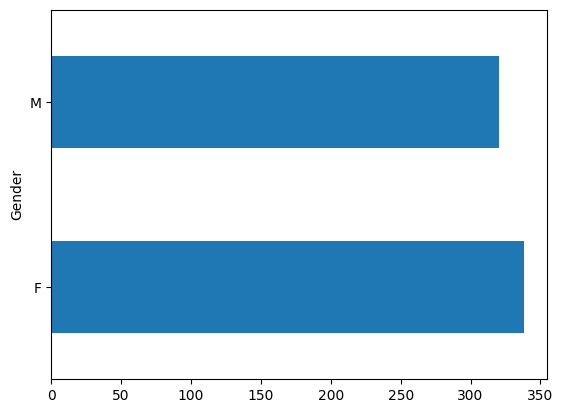

In [20]:
#A Bargraph showing the most prevalent cases of anxiety and depression  with regards to Gender 
shamiri_data['Gender'].value_counts().plot(kind="barh")

* *Females show higher cases of anxiety and depression as compared to their male counterparts*

<Axes: ylabel='Tribe'>

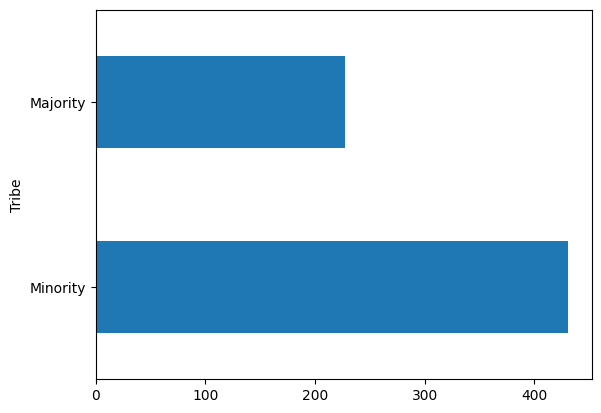

In [23]:
#A Bargraph showing the most prevalent cases of Anxiety and Depression with regards to Tribe 
shamiri_data['Tribe'].value_counts().plot(kind="barh")

* *The Minority tribe has most cases of depression and anxiety*

<Axes: ylabel='School'>

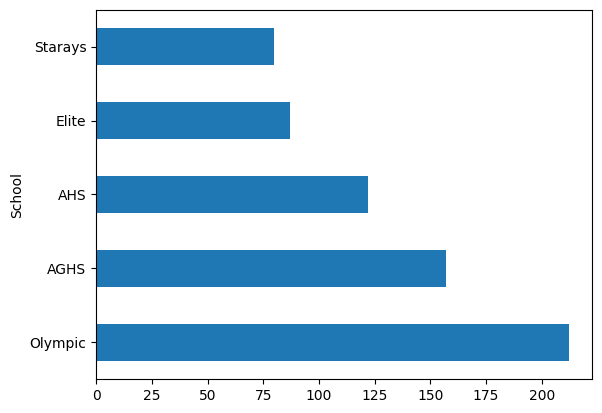

In [22]:
#A Bargraph showing the most prevalent cases of anxiety and depression in Different Schools
shamiri_data['School'].value_counts().plot(kind="barh")

* *Olympic school has the most cases of Depression and Anxiety whereas Starays has the least*